In [1]:
from typing import List
import numpy as np
from vector_space_model import VectorSpaceModel

Preprocessed data not found. The system is going to make new indexes.
Stop words loaded successfully.
Parsing	ResearchPapers\1.txt
Parsing	ResearchPapers\11.txt
Parsing	ResearchPapers\12.txt
Parsing	ResearchPapers\13.txt
Parsing	ResearchPapers\14.txt
Parsing	ResearchPapers\15.txt
Parsing	ResearchPapers\16.txt
Parsing	ResearchPapers\17.txt
Parsing	ResearchPapers\18.txt
Parsing	ResearchPapers\2.txt
Parsing	ResearchPapers\21.txt
Parsing	ResearchPapers\22.txt
Parsing	ResearchPapers\23.txt
Parsing	ResearchPapers\24.txt
Parsing	ResearchPapers\25.txt
Parsing	ResearchPapers\26.txt
Parsing	ResearchPapers\3.txt
Parsing	ResearchPapers\7.txt
Parsing	ResearchPapers\8.txt
Parsing	ResearchPapers\9.txt

Saving all computed indexes on the drive.
Total entires in the collection	20.
5294


In [2]:
vector_space_model = VectorSpaceModel(
    documents_path="ResearchPapers",
    stop_words_file_path="Stopword-List.txt",
)
vector_space_model.initiate()

Preprocessed data not found. The system is going to make new indexes.
Stop words loaded successfully.
Parsing	ResearchPapers\1.txt
Parsing	ResearchPapers\11.txt
Parsing	ResearchPapers\12.txt
Parsing	ResearchPapers\13.txt
Parsing	ResearchPapers\14.txt
Parsing	ResearchPapers\15.txt
Parsing	ResearchPapers\16.txt
Parsing	ResearchPapers\17.txt
Parsing	ResearchPapers\18.txt
Parsing	ResearchPapers\2.txt
Parsing	ResearchPapers\21.txt
Parsing	ResearchPapers\22.txt
Parsing	ResearchPapers\23.txt
Parsing	ResearchPapers\24.txt
Parsing	ResearchPapers\25.txt
Parsing	ResearchPapers\26.txt
Parsing	ResearchPapers\3.txt
Parsing	ResearchPapers\7.txt
Parsing	ResearchPapers\8.txt
Parsing	ResearchPapers\9.txt

Saving all computed indexes on the drive.
Total entires in the collection	20.


1

In [3]:
X = []
doc_seq = []
for i in vector_space_model.vsm_index:
    doc_seq.append(int(i[0]))
    X.append(i[1])
y = vector_space_model.make_y(doc_seq=doc_seq)
X = np.array(X)

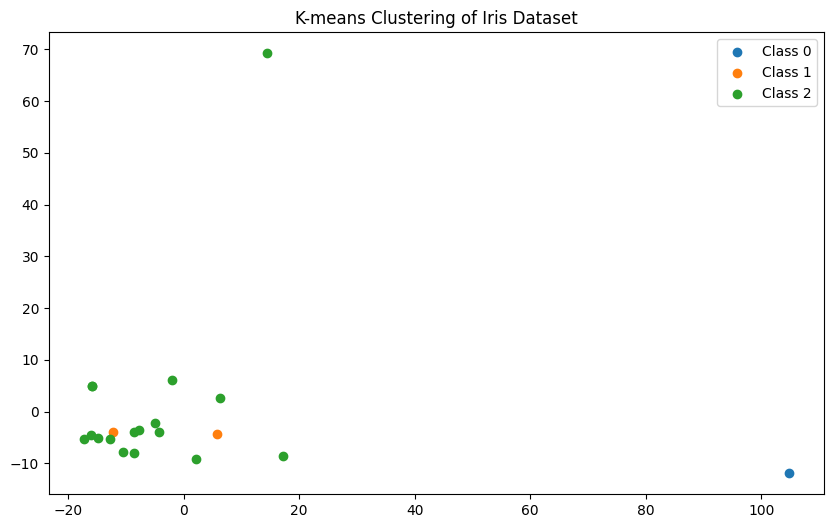

In [6]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# Reduce dimensionality for visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Visualize the clusters
plt.figure(figsize=(5,5))

for i in range(3):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], label=f"Class {i}")

plt.title('K-means Clustering of Iris Dataset')
plt.legend()
plt.show()